In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("50_Startups.csv")

In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]

In [5]:
dependent=dataset[["Profit"]]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)



In [7]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\anaconda\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor= DecisionTreeRegressor(criterion="absolute_error",splitter="best")
regressor=regressor.fit(x_train,y_train)

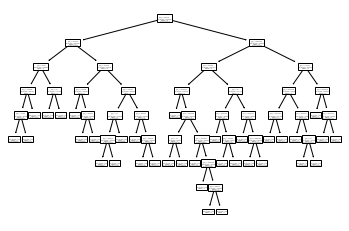

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [19]:
y_pred=regressor.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [21]:
r_score

0.9559077772579302

In [13]:
import pickle
filename="finalized_model_SVM.sav"
pickle.dump(regressor,open(filename,'wb'))

In [14]:
loaded_model=pickle.load(open("finalized_model_SVM.sav",'rb'))
result=loaded_model.predict([[1234,345,4565,1,0]])

C:\anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [15]:
result

array([35673.41])